In [1]:
from math import factorial
from datetime import datetime
from scipy.special import comb
from scipy import linspace
import timeit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper functions

In [3]:
def unit_step_function(a, t):
    if t < a:
        return 0
    else:
        return 1

In [4]:
# Computational functions

In [5]:
# cdf: calculates probability that n random variables has a sum of t

def cdf(n, t):
    if n <= 0:
        return 0
    else:
        mySum = 0.0
        for i in range(n+1):
            mySum += ((-1)**i * comb(n, i) * ((t-i)**n)/factorial(n) * unit_step_function(i, t))
        return mySum

In [6]:
# def cdf_alt(n, t):
#     if n <= 0:
#         return 0
#     else:
#         mySum = 0.0
#         for i in range(n+1):
#             mySum += (pow(-1, i) * comb(n, i) * (pow(t-i, n))/factorial(n) * unit_step_function(i, t))
            

In [7]:
# def cdf_alt_2(n, t):
#     if n <= 0:
#         return 0
#     else:
#         mySum = 0.0
#         for i in range(n+1):
#             mySum += (pow(-1, i) * factorial(n)/factorial(i)/factorial(n-i) * (pow(t-i, n))/factorial(n) * unit_step_function(i, t))

In [8]:
# cdf_multiple_values: calculates cdf for multiple values of t

def cdf_multiple_values(n, t):
    cdf_values = []
    for target_value in t:
        cdf_values.append(cdf(n, target_value))
    return cdf_values

In [9]:
# find_target_value: finds the sum of n random variables given a probability

def find_target_value(n, cdf_value):
    cdf_value *= 1.0
    t_index = 0
    while cdf(n, t_index) < cdf_value:
        t_index+=1
    if cdf_value -.001 <= cdf(n, t_index) <= cdf_value + .001:
        return t_index
    else:
        lower_bound = t_index-1.0
        bound_difference = 1.0
        midpoint = lower_bound + bound_difference/2.0
        bound_difference/=2.0
        midpoint_cdf = cdf(n, midpoint)
        while not cdf_value - .01 <= midpoint_cdf <= cdf_value+.01:
            if midpoint_cdf > cdf_value:
                midpoint -= bound_difference/2.0
            else:
                midpoint += bound_difference/2.0
            midpoint_cdf = cdf(n, midpoint)
            bound_difference /= 2.0
        return midpoint

In [12]:
 #%timeit cdf(8,8)

In [13]:
# %timeit cdf_alt(8,8)

In [14]:
# %timeit cdf_alt_2(6,6)

In [15]:
# Graphing functions

In [16]:
def cdf_plotter(n, multiple_n = False):
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.ylabel('Probability')
    plt.xlabel('Sum')
    if multiple_n:
        for number in n:
            cdf_plotter(number)
    else:
        x = linspace(0, n+2, 500)
        plt.plot(x, cdf_multiple_values(n,x), label='n = {i}'.format(i=n))
        plt.legend(loc='best')

In [17]:
def threshold_plotter(n, cdf, multiple_n = False, multiple_cdf = False):
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.ylabel('Probability')
    plt.xlabel('Sum')
    if multiple_n:
        for n_value in n:
            x = linspace(0, n_value+2, 500)
            plt.plot(x, cdf_multiple_values(n_value,x), label='n = {i}'.format(i=n_value))
            plt.legend(loc='best')
            if multiple_cdf:
                for cdf_value in cdf:
                    x = find_target_value(n_value, cdf_value)
                    y = cdf_value
                    plt.plot(x, y, marker='o', color='black', label='t = {i}'.format(i=x))
            else:
                x = find_target_value(n_value, cdf)
                y = cdf
                plt.plot(x, y, market='o', color='black', label='t = {i}'.format(i=x))
    else:
        x = linspace(0, n+2, 500)
        plt.plot(x, cdf_multiple_values(n,x), label='n = {i}'.format(i=n))
        plt.legend(loc='best')
        if multiple_cdf:
            for cdf_value in cdf:
                x = find_target_value(n, cdf_value)
                y = cdf_value
                plt.plot(x, y, marker='o', color='black', label='t = {i}'.format(i=x))
        else:
            x = find_target_value(n, cdf)
            y = cdf
            plt.plot(x, y, marker='o', color='black', label='t = {i}'.format(i=x))
        

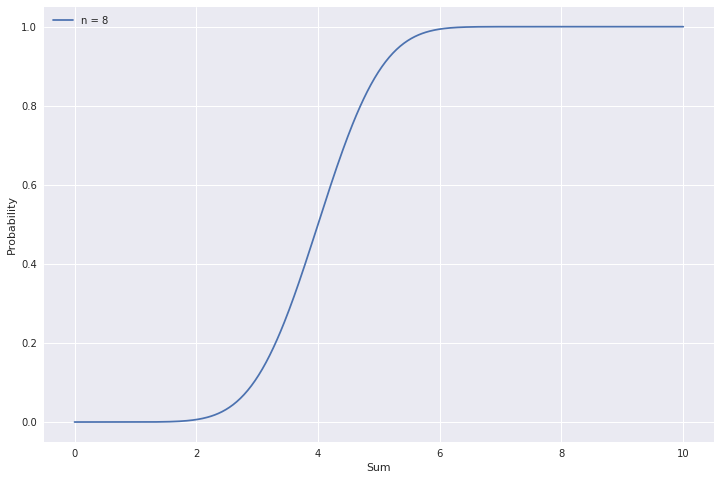

In [18]:
# cdf_plotter(8)

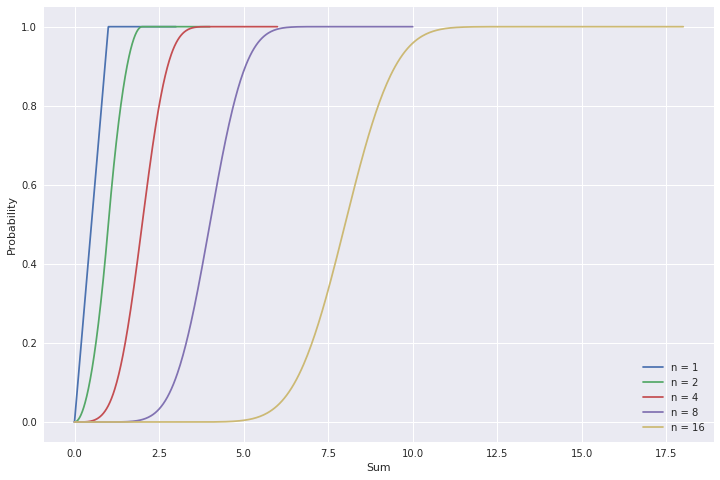

In [19]:
# cdf_plotter([1,2,4,8,16], True)

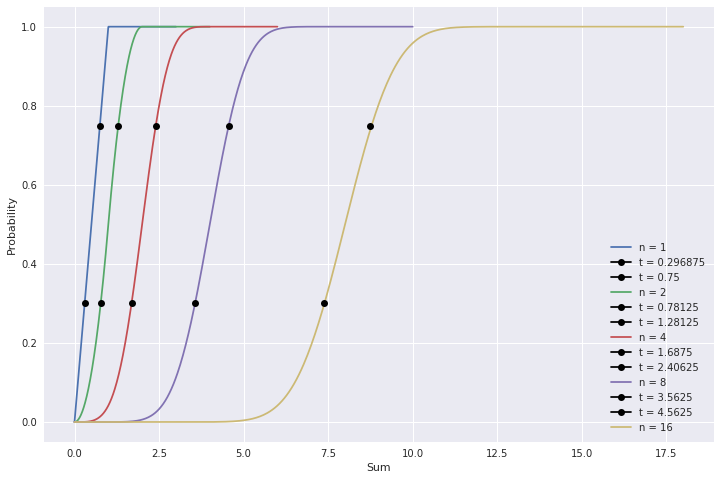

In [20]:
# threshold_plotter([1,2,4,8,16], [.3, .75], True, True)